In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from census import Census
import gmaps
from us import states
from config import gkey


# # Census API Key
from config import api_key
c = Census(api_key, year=2018)

gmaps.configure(api_key=gkey)

#definition of pending
# Days to Pending: How long it takes homes in a region to change to pending 
# status on Zillow.com after first being shown as for sale. The reported figure 
# indicates the number of days (mean or median) that it took for homes that went 
# pending during the week being reported, to go pending. This differs from the 
# old “Days on Zillow” metric in that it excludes the in-contract period before 
# a home sells.


# read CSV Listings that are pending on zillow.
mean_pending_data = pd.read_csv('Resources/mean_pending_data.csv')
mean_pending_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,States,1/31/18,2/28/18,3/31/18,4/30/18,...,12/31/19,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20
0,102001,0,United States,Country,NaN,NaN,74.0,73.0,67,59,...,66.0,70.0,70.0,64.0,57.0,53,53.0,52.0,49.0,46
1,394913,1,"New York, NY",Msa,NY,New York,99.0,96.0,86,75,...,96.0,102.0,103.0,100.0,92.0,87,80.0,74.0,68.0,65
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,California,47.0,44.0,39,34,...,52.0,54.0,51.0,43.0,37.0,35,35.0,36.0,35.0,33
3,394463,3,"Chicago, IL",Msa,IL,Illinois,82.0,79.0,65,52,...,74.0,81.0,80.0,70.0,60.0,55,53.0,50.0,47.0,45
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,Texas,61.0,58.0,53,45,...,63.0,67.0,66.0,62.0,55.0,51,50.0,48.0,47.0,45


In [2]:
# removing unecessary columns and getting the mean of the days pending 
pending_data = mean_pending_data
pending_data['Mean'] = pending_data.iloc[:,5:].mean(axis=1)
pending_data = pending_data.sort_values(by='Mean', ascending=False)
pending_data = pending_data.drop_duplicates('States')
pending_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,States,1/31/18,2/28/18,3/31/18,4/30/18,...,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,Mean
70,394843,71,"McAllen, TX",Msa,TX,Texas,91.0,89.0,100,108,...,128.0,120.0,105.0,102.0,103,103.0,104.0,101.0,95,106.181818
83,394440,84,"Fort Myers, FL",Msa,FL,Florida,91.0,89.0,87,87,...,93.0,94.0,93.0,90.0,91,91.0,106.0,104.0,101,93.121212
36,395194,36,"Virginia Beach, VA",Msa,VA,Virginia,101.0,104.0,97,88,...,101.0,106.0,102.0,108.0,106,109.0,104.0,97.0,83,90.727273
1,394913,1,"New York, NY",Msa,NY,New York,99.0,96.0,86,75,...,102.0,103.0,100.0,92.0,87,80.0,74.0,68.0,65,85.666667
66,394318,67,"Allentown, PA",Msa,PA,Pennsylvania,89.0,91.0,86,84,...,101.0,109.0,100.0,97.0,82,76.0,61.0,55.0,52,83.151515


In [28]:
#get the top 3 states with the highest days pending and the bottom 3 states with the shortest days pending 
# will be merged with list price below
pend_interest = pending_data[['StateName','Mean']]
pend_interest = pend_interest.loc[(pend_interest['StateName']=="VA")|(pend_interest['StateName']=="FL")|
                                (pend_interest['StateName']=="TX")|(pend_interest['StateName']=="ID")|
                                (pend_interest['StateName']=="UT")|(pend_interest['StateName']=="WA")]
pd.options.display.float_format="{:.0f}".format

clean_pend_interest = pend_interest.reset_index()
clean_pend_interest = clean_pend_interest[['StateName','Mean']]
clean_pend_interest


,StateName,Mean
0,TX,106
1,FL,93
2,VA,91
3,UT,36
4,ID,35
5,WA,27


# Bar Graph that shows the mean of pending days over the course of 2 years by state


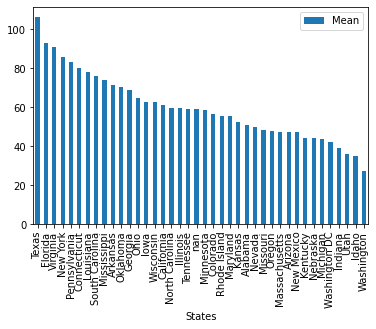

In [4]:
clean_mean_bar = pending_data.plot(x="States", y="Mean", kind="bar")
plt.show()


# Percent change over the last two years

In [5]:
#percent change over the past 2 years
percent_change = pending_data[['States','1/31/18','9/30/20']]
percent_change = percent_change.sort_values(by='States', ascending=True)
percent_change.head()

,States,1/31/18,9/30/20
49,Alabama,78.0,35
14,Arizona,59.0,32
75,Arkansas,80.0,36
113,California,87.0,37
110,Colorado,52.0,39


In [6]:
#percent change 
percent_change_form = ((percent_change['9/30/20']/percent_change['1/31/18'])-1)*100


In [7]:
#add list to exsisting DF
percent_change['% Change'] = percent_change_form
percent_change.head()

,States,1/31/18,9/30/20,% Change
49,Alabama,78.0,35,-55.128205
14,Arizona,59.0,32,-45.762712
75,Arkansas,80.0,36,-55.000000
113,California,87.0,37,-57.471264
110,Colorado,52.0,39,-25.000000


In [8]:
#clean data and make it simple
percent_change = percent_change.drop_duplicates('States')
percent_change.head()

,States,1/31/18,9/30/20,% Change
49,Alabama,78.0,35,-55.128205
14,Arizona,59.0,32,-45.762712
75,Arkansas,80.0,36,-55.000000
113,California,87.0,37,-57.471264
110,Colorado,52.0,39,-25.000000


# Bar Graph to show how the pending days have changed over the course of 2 years

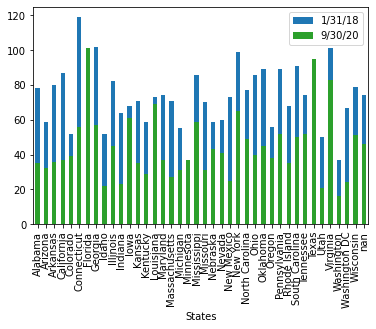

In [9]:
#showing both the intital and ending dates 
ax = percent_change.plot(x="States", y="1/31/18", kind="bar")
percent_change.plot(x="States", y="9/30/20", kind="bar", ax=ax, color="C2")
plt.show()

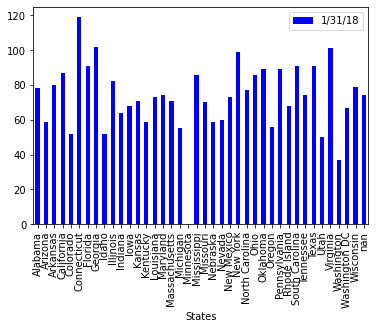

In [10]:
#Bar Graph of Intial value and ending values 
initial_bar = percent_change.plot(x="States", y="1/31/18", kind="bar", color="blue")
plt.show()

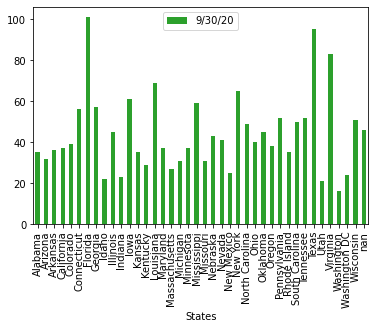

In [11]:
#Bar Graph ending values 
initial_bar = percent_change.plot(x="States", y="9/30/20", kind="bar", color="C2")
plt.show()

# Census Data

In [12]:
#bringing in census data 
single_family_df = pd.read_csv("Resources/census_data_states.csv")
single_family_df.head()

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,27,Minnesota,5527358.0,37.9,68411.0,36245.0,547442.0,9.904225,2.156871
1,28,Mississippi,2988762.0,37.2,43567.0,23434.0,599795.0,20.068343,3.681658
2,29,Missouri,6090062.0,38.5,53560.0,29537.0,837930.0,13.758973,2.560861
3,30,Montana,1041732.0,39.8,52559.0,29765.0,139063.0,13.349211,2.153433
4,31,Nebraska,1904760.0,36.4,59116.0,31101.0,213790.0,11.223986,1.918614


In [13]:
# Read in the csv containing state centroid coordinates
centroids = pd.read_csv("Resources/state_centroids.csv")
centroids.head()

,State,Latitude,Longitude
0,Alabama,32.7794,-86.8287
1,Alaska,64.0685,-152.2782
2,Arizona,34.2744,-111.6602
3,Arkansas,34.8938,-92.4426
4,California,37.1841,-119.4696


# Compare and contrast median List Price on the states with the longest days pending

California, Florida, Texas

In [14]:
#read csv
median_list_price = pd.read_csv("Resources/median_list_price.csv")
median_list_price.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,12/31/17,1/31/18,2/28/18,3/31/18,4/30/18,...,12/31/19,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20
0,102001,0,United States,Country,NaN,273786.0,271667.0,273167.0,279667.0,289333.0,...,303267,299800,301466,306500,312666,320000,327833,335167,341133,343300.0
1,394913,1,"New York, NY",Msa,NY,523300.0,523267.0,528266.0,538266.0,549966.0,...,579300,577667,579667,586333,594333,599300,606267,619933,636633,649966.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,792267.0,795533.0,798933.0,812600.0,829633.0,...,844600,847967,862933,879633,879633,876000,884667,918000,948333,956667.0
3,394463,3,"Chicago, IL",Msa,IL,306300.0,300967.0,305967.0,319300.0,335600.0,...,309833,304633,308966,318933,326330,330297,335297,343233,348233,349900.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,341330.0,341663.0,345000.0,351633.0,359633.0,...,338330,335630,335168,336835,339501,343267,348597,355263,358297,359600.0


In [15]:
#Get the mean of the median list price over two years  
long_days = median_list_price
long_days['Mean'] = long_days.iloc[:,6:].mean(axis=1)
long_days.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,12/31/17,1/31/18,2/28/18,3/31/18,4/30/18,...,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,Mean
0,102001,0,United States,Country,NaN,273786.0,271667.0,273167.0,279667.0,289333.0,...,299800,301466,306500,312666,320000,327833,335167,341133,343300.0,305946.545455
1,394913,1,"New York, NY",Msa,NY,523300.0,523267.0,528266.0,538266.0,549966.0,...,577667,579667,586333,594333,599300,606267,619933,636633,649966.0,573972.606061
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,792267.0,795533.0,798933.0,812600.0,829633.0,...,847967,862933,879633,879633,876000,884667,918000,948333,956667.0,831447.636364
3,394463,3,"Chicago, IL",Msa,IL,306300.0,300967.0,305967.0,319300.0,335600.0,...,304633,308966,318933,326330,330297,335297,343233,348233,349900.0,327219.606061
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,341330.0,341663.0,345000.0,351633.0,359633.0,...,335630,335168,336835,339501,343267,348597,355263,358297,359600.0,347107.818182


In [16]:
#Filtering down to the states of interest. With the highest and the lowest days pending.
long_days = long_days[['StateName','Mean']]
long_days = long_days.drop_duplicates('StateName')
# g_days = long_days.sort_values(by='StateName', ascending=True)
list_price_of_interest = long_days.loc[(long_days['StateName']=="VA")|(long_days['StateName']=="FL")|
                                (long_days['StateName']=="TX")|(long_days['StateName']=="ID")|
                                (long_days['StateName']=="UT")|(long_days['StateName']=="WA")]

list_price_of_interest = list_price_of_interest.sort_values(by='StateName', ascending=False)
list_price_of_interest


,StateName,Mean
15,WA,610469.212121
36,VA,290834.060606
50,UT,424817.969697
4,TX,347107.818182
85,ID,370530.121212
8,FL,398612.909091


In [17]:
#merge the top 3 and bottom 3 pending days with its corresponding list price
pend_list_price = pd.merge(list_price_of_interest, pend_interest, on="StateName")
pend_list_price = pend_list_price.rename(columns={"Mean_x":"Mean List Price"})
pend_list_price = pend_list_price.rename(columns={"Mean_y":"Mean Days Pending"})
pd.options.display.float_format="{:.2f}".format
pend_list_price

,StateName,Mean List Price,Mean Days Pending
0,WA,610469.21,27.42
1,VA,290834.06,90.73
2,UT,424817.97,35.94
3,TX,347107.82,106.18
4,ID,370530.12,34.88
5,FL,398612.91,93.12


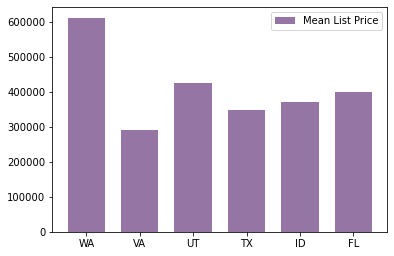

In [18]:
# Create bars
barWidth = 0.7
# The Y position
bars1 = pend_list_price['Mean List Price']
# The X position of bars
r1 = pend_list_price['StateName'] 
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Mean List Price')
# Create legend
plt.legend()
 
# Create labels
label = ['$610,469.21', '$424,817.96', '$398,612.90', '$370,530.12', '$347,107.81', '$290,834.06']
plt.subplots_adjust(bottom= 0.2, top = 0.98)
for i, v in enumerate(bars1):
    ax.text(bars1 + 3, i + .25, str(v), color='black', fontweight='bold')
 # Show graphic
plt.show()


# This graph shows the mean list price for the top 3 and bottom 3 per state

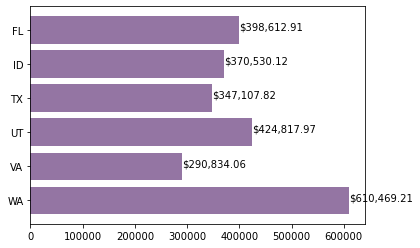

In [19]:
#graph to show mean list price over the last 2 years 
barWidth = 0.7

y = pend_list_price['Mean List Price']
x = pend_list_price['StateName']

plt.barh(x, y, color = (0.3,0.1,0.4,0.6))

for index, value in enumerate(y):
    plt.text(value, index, ("${:,.2f}".format(value)))


# This graph shows the mean number of days pending per state

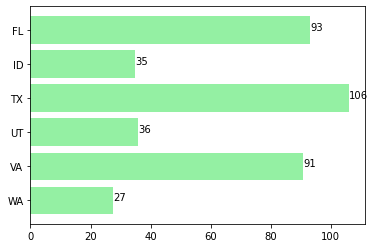

In [20]:
#graph to show the number of days pending over the last 2 years
barWidth = 0.7

y = pend_list_price['Mean Days Pending']
x = pend_list_price['StateName']

plt.barh(x, y, color = (0.3,0.9,0.4,0.6))

for index, value in enumerate(y):
    plt.text(value, index, ("{:,.0f}".format(value)))

# Since that didn't make sense, maybe population has something to do with it

In [21]:
#bring in the census data 
single_family_df.head()

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,27,Minnesota,5527358.00,37.90,68411.00,36245.00,547442.00,9.90,2.16
1,28,Mississippi,2988762.00,37.20,43567.00,23434.00,599795.00,20.07,3.68
2,29,Missouri,6090062.00,38.50,53560.00,29537.00,837930.00,13.76,2.56
3,30,Montana,1041732.00,39.80,52559.00,29765.00,139063.00,13.35,2.15
4,31,Nebraska,1904760.00,36.40,59116.00,31101.00,213790.00,11.22,1.92


In [22]:
population_data = single_family_df[['Name','Population','Household Income','Poverty Count']]
population_data = population_data.loc[(population_data['Name']=="Virginia")|(population_data['Name']=="Florida")|
                                (population_data['Name']=="Texas")|(population_data['Name']=="Idaho")|
                                (population_data['Name']=="Utah")|(population_data['Name']=="Washington")]
population_data =  population_data.sort_values(by='Name', ascending=False)
population_data

,Name,Population,Household Income,Poverty Count
25,Washington,7294336.00,70116.00,821621.00
23,Virginia,8413774.00,71564.00,893580.00
21,Utah,3045350.00,68374.00,309904.00
20,Texas,27885195.00,59570.00,4213938.00
40,Idaho,1687809.00,53089.00,228882.00
38,Florida,20598139.00,53267.00,2983851.00


# Graph to show population count per state

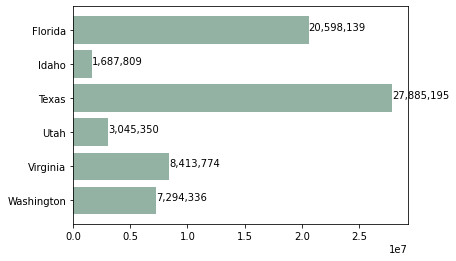

In [23]:
barWidth = 0.7

y = population_data['Population']
x = population_data['Name']

plt.barh(x, y, color = (0.3,0.5,0.4,0.6))

for index, value in enumerate(y):
    plt.text(value, index, (f'{int(value):,}'))